<a href="https://colab.research.google.com/github/abhialag/iiscdlfa/blob/master/M3_AST_24_GAN_MNIST_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 24 : Implementation of Generative Adversarial Networks

## Learning Objectives:

At the end of the experiment, you will be able to :

* Understand GAN
* Generate fake images of MNIST dataset

## Dataset

###Description

We use the MNIST dataset for this experiment. Below are the details:

1. The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples,
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately).
2. Each image is Size Normalized and Centered
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value.
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.

### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.



## Domain Information


Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)



## Information

### Generative Models

Informally:

* Generative models can generate new data instances.
* Discriminative models discriminate between different kinds of data instances.

A generative model could generate new photos of animals that look like real animals, while a discriminative model could tell a dog from a cat. GANs are just one kind of generative model.

More formally, given a set of data instances X and a set of labels Y:

* Generative models capture the joint probability p(X, Y), or just p(X) if there are no labels.
* Discriminative models capture the conditional probability p(Y | X).

A generative model includes the distribution of the data itself, and tells you how likely a given example is. For example, models that predict the next word in a sequence are typically generative models (usually much simpler than GANs) because they can assign a probability to a sequence of words.

A discriminative model ignores the question of whether a given instance is likely, and just tells you how likely a label is to apply to the instance.

Note that this is a very general definition. There are many kinds of generative model. GANs are just one kind of generative model.




### Generative Adversarial Networks


GANs are generative models devised by Goodfellow et al. in 2014. GAN is about creating, like drawing a portrait or composing a symphony. This is hard compared to other deep learning fields. For instance, it is much easier to identify a Monet painting than painting one.


The main focus of GAN is to generate data from scratch, mostly images but other domains including music have been done.

A GAN, or Generative Adversarial Network, is a generative model that simultaneously trains two models: a generative model 'G' that captures the data distribution, and a discriminative model 'D' that estimates the probability that a sample came from the training data rather than 'G'.

GAN composes of two deep networks :

* Generator
* Discriminator


#### Generator

The generator tries to produce data that come from some probability distribution. The generator learns to generate plausible data. The generated instances become negative training examples for the discriminator.

For example, that would be you trying to reproduce the party’s tickets.

#### Discriminator

The discriminator acts like a judge. It gets to decide if the input comes from the generator or from the true training set. For example, that would be the party’s security comparing your fake ticket with the true ticket to find flaws in your design.

The discriminator learns to distinguish the generator's fake data from real data. The discriminator penalizes the generator for producing implausible results.

When training begins, the generator produces obviously fake data, and the discriminator quickly learns to tell that it's fake.

In summary, we can say that :

* The generator trying to maximize the probability of making the discriminator mistake its inputs as real.

* And the discriminator guiding the generator to produce more realistic images.



![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/gan.png)

To illustrate this notion of “generative models”, we can take a look at some well known example on MNIST obtained with GANs

During training, the generator progressively becomes better and better and tries to "fool" the discriminator into believing the generated images are real! When the discriminator starts classifying the generated images as real, it means the generated images are of sufficient quality. The generator thus has become capable enough to "generate images". An example is provided below. An example is provided below:

<img src="https://tensorflow.org/images/gan/dcgan.gif" />

Both the generator and the discriminator are neural networks. The generator output is connected directly to the discriminator input. Through backpropagation, the discriminator's classification provides a signal that the generator uses to update its weights.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236308" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9108369487" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M3_AST_24_GAN_MNIST_C" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required  Packages




In [4]:
import itertools
import math
import time
import matplotlib.pyplot as plt
from IPython import display

# Pytorch Packages
import torch
import torchvision
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

### Loading the MNIST data

Now, we'll load the MNIST data. For the first time, we may have to download the data, which can take a while.

Now,

* We will load both the training set and the testing sets

* We will use transform.compose(), which combines all the transformation that are provided to be applied on the dataset.

* We will use transforms.ToTensor() which converts the input images to PyTorch tensor.  

* We also use transforms.Normalize() which is to scale the input images and the precomputed values (mean and std) for the dataset is passed to the Normalize() method.



In [5]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))])

train_dataset = dsets.MNIST(root='./data/', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 362413473.31it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29530885.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 164128708.66it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24870141.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



 Let’s visualize a image from the training set

Shape of the training data (no of images, height, width) :  torch.Size([60000, 28, 28])


An Example Image


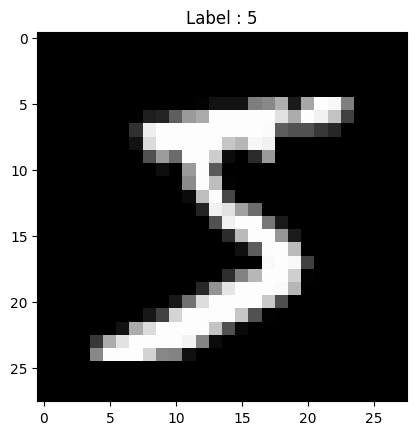

In [6]:
# Plotting one example
print("Shape of the training data (no of images, height, width) : ", train_dataset.train_data.size()) # (60000, 28, 28)
print("\n")
print("An Example Image")
plt.imshow(train_dataset.train_data[0].numpy(), cmap='gray')
plt.title('Label : %i' % train_dataset.train_labels[0])
plt.show()

**torch.utils.data.DataLoader** class represents a Python iterable over a dataset, with following features.

1. Batching the data - `batch_size`, which denotes the number of samples (images) contained in each generated batch. The Machine learning dataset can be really large. Hence we cannot often load the entire data into the memory. Hence neural network training is done by loading small batches (commonly called minibatch) of data and using it to update the learnable parameters (weights and biases) of the model.

2. Shuffling the data - If set to `shuffle=True`, we will get a new order of exploration at each pass. Shuffling the order in which examples are fed to the classifier is helpful so that batches between epochs do not look alike. By performing it will eventually make our model more robust.



The train data is provided via data loaders that provide iterators over the datasets to train our models.

In [7]:
# The mini batch size used for training
batch_size = 100

# Loading the train dataset
# Data Loader loads the images and corresponding labels of defined mini batch size.
# the image batch shape will be (batch_size, 1, 28, 28)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels where '1' represents one input image channel i.e. grey scale. y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training digit.

In [8]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([100, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([100]) type: torch.LongTensor


### Plotting the  first 10 training digit images

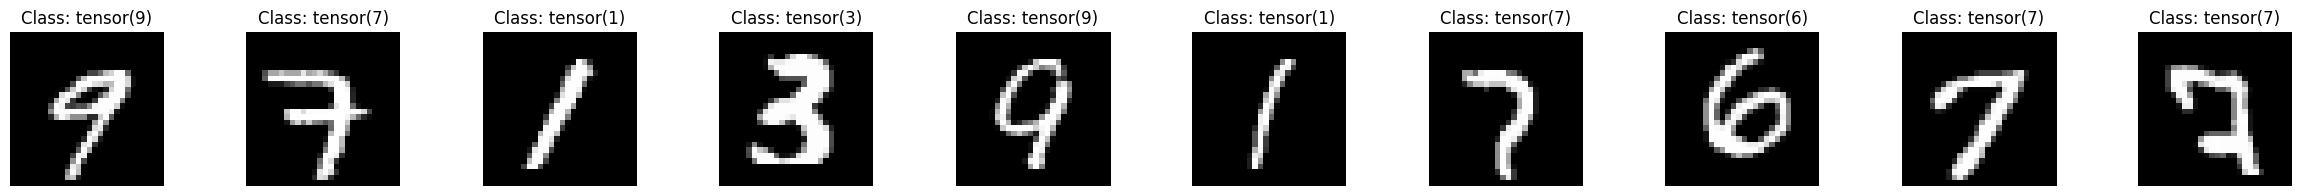

In [9]:
pltsize=2
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')

    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

### Defining the Discriminator Model

The discriminator is a binary classifier consisting of only **fully-connected layers**.

* Inputs the flattened image of dimension 784, and outputs a score between 0 and 1.
    
* Has Leaky Relu in the intermediate layers
    
* Has the Sigmoid activation function in the output layer

The forward function of the discriminator, flattens the input feeds from the vector to the discriminator, and returns the result, indicating whether the image is real or fake.

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.model(x.view(x.size(0), 784))
        out = out.view(out.size(0), -1)
        return out

### Defining the Generator Model

The Generator is a **fully connected network** that takes a noise vector (latent_dim) as an input and outputs a `784-dimensional vector`. Consider the generator as a decoder fed with a low-dimensional vector (100-d) and outputs an upsampled high-dimensional vector (784-d).


The network mainly consists of dense layers, leakyrelu & tanh activation function.

* The first layer has `256` neurons, doubled at every new linear layer, up to `1024` neurons.
    
* `Leaky ReLU` has been used as the activation function in this network for the intermediate layers with a negative slope as 0.2, meaning the features with a value below -0.2 will be squashed to 0.

* The last linear layer has input neurons as `1024` and the output dimension as `784(28*28)` neurons
    
* The `tanh` activation at the output layer ensures that the pixel values are mapped in line with its own output, i.e., between (-1, 1) ( remember, we normalized the images to range [-1, 1] ).


The forward the function of the generator feeds the noise vector (normal distribution) to the model, then reshapes the 784-d vector to (1, 28, 28), the original image shape, and finally, the image is returned. The generator, as we know, mimics the real data distribution without actually seeing it.

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out

### Initializing the CUDA

In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Creating the Generator and Discriminator instance

In [13]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)

### Defining the Optimizer

In [14]:
criterion = nn.BCELoss()
lr = 0.0002
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

### Training Discriminator Function

1. Input, the Discriminator, takes the real data from the training dataset and the fake data from the generator.

#### Discriminator loss

The discriminator's loss quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [15]:
def train_discriminator(discriminator, images, real_labels, fake_images, fake_labels):

    # Train on real images
    # Reset gradients
    discriminator.zero_grad()
    prediction_real = discriminator(images)

    # Comparing original images
    real_loss = criterion(prediction_real, real_labels)

    # Train on fake images
    prediction_fake = discriminator(fake_images)

    # Comparing fake images
    # Calculate error and backpropagate
    fake_loss = criterion(prediction_fake, fake_labels)
    d_loss = real_loss + fake_loss
    d_loss.backward()

    # Update weights with gradients
    d_optimizer.step()
    return d_loss, prediction_real, prediction_fake

### Training Generator Function

#### Generator loss

The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.

In [16]:
def train_generator(generator, fake_images, real_labels):
    # Train Generator
    # Reset gradients
    generator.zero_grad()

    # Sample noise and generate fake data
    discriminator_outputs = discriminator(fake_images)

    # Calculate error and backpropagate
    g_loss = criterion(discriminator_outputs, real_labels)
    g_loss.backward()

    # Update weights with gradients
    g_optimizer.step()

    # Return error
    return g_loss

### Generate Samples for Testing

In [17]:
# Draw samples from the input distribution to inspect the generation on training
num_test_samples = 16
test_noise = torch.randn(num_test_samples, 100).to(device)

### Lets start training the GAN, in below output the image gets updated for every iteration

**Note:** The below training process for 150 epochs will take around 1hr 15 mins to complete the execution.

In [18]:
!mkdir results

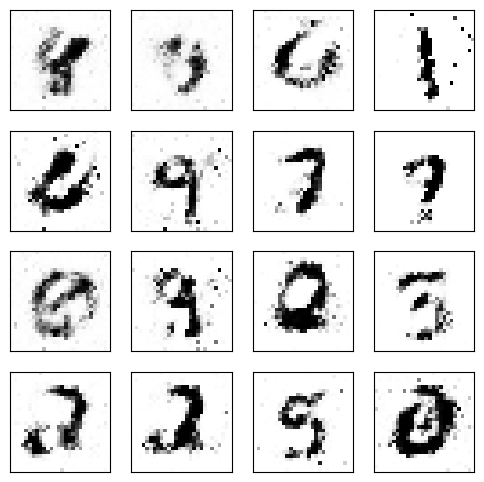

Epoch [10/10], Step[600/600], d_loss: 0.9876, g_loss: 1.3408, D(x): 0.62, D(G(z)): 0.30


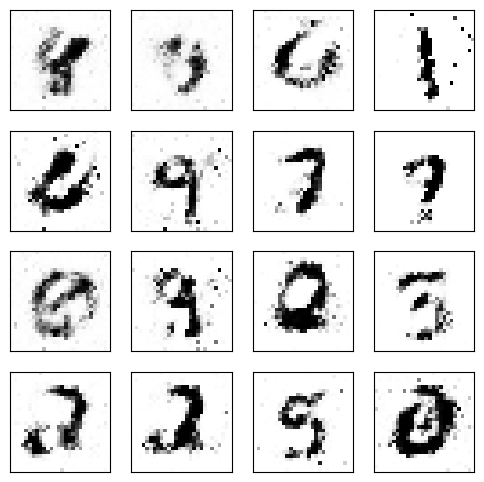

In [20]:
# Create figure for plotting
size_figure_grid = int(math.sqrt(num_test_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)

# Set number of epochs and initialize figure counter
num_epochs = 10   # Increase the no of epochs to see the better quality images
num_batches = len(train_loader)
num_fig = 0


for epoch in range(num_epochs):
    for n, (images, _) in enumerate(train_loader):
        images = images.to(device)
        real_labels = torch.ones(images.size(0), 1).to(device)

        # Sample from generator
        # Generate fake images by passing the random noise vector to the generator
        noise = torch.randn(images.size(0), 100).to(device)
        fake_images = generator(noise)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        # Train the discriminator
        d_loss, d_pred_real, d_pred_fake = train_discriminator(discriminator, images, real_labels, fake_images, fake_labels)

        # Sample again from the generator
        noise = torch.randn(images.size(0), 100).to(device)
        fake_images = generator(noise)

        # Train the generator
        g_loss = train_generator(generator, fake_images, real_labels)

        if (n+1) % 100 == 0:
            test_images = generator(test_noise)

            for k in range(num_test_samples):
                i = k//4
                j = k%4
                ax[i,j].cla()
                ax[i,j].imshow(test_images[k,:].data.cpu().numpy().reshape(28, 28), cmap='Greys')
            display.clear_output(wait=True)
            display.display(plt.gcf())

            plt.savefig('results/mnist-gan-%03d.png')
            num_fig += 1
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f, '
                  'D(x): %.2f, D(G(z)): %.2f'
                  %(epoch + 1, num_epochs, n+1, num_batches, d_loss.item(), g_loss.item(),
                    d_pred_real.data.mean(), d_pred_fake.data.mean()))

fig.show()

### Please answer the questions below to complete the experiment:




Consider the following statements about GANs and answer question Q.1


A. The generator takes as input a random noise and transforms it into an imitation of the real image and attempts to fool the discriminator.

B. The discriminator takes as input a random noise and transforms it into an imitation of the real image and attempts to fool the generator.

C. The discriminator distinguishes between the real image and the image
created by the generator.

D. The generator distinguishes between the real image and the image created by the discriminator.

In [21]:
#@title Q.1. Which of the above statement(s) is/are True regarding Generator and Discriminator in GANs?
Answer1 = "Both A and C" #@param ["","Only A","Only C", "Only D", "Both A and B", "Both A and C", "Both C and D"]


Consider the below cost function and study the following statements and answer question Q.2

<br>

$E_x[log(D(x))] + E_z[log(1 - D(G(z)))]$

<br>

A. The generator loss is then calculated from the discriminator's classification - it gets rewarded if it successfully fools the discriminator, and gets penalized otherwise.

B. The generator can't directly affect the $log(D(x))$ term in the function, so, for the generator, minimizing the loss is equivalent to minimizing $log(1 - D(G(z)))$.



In [22]:
#@title Q.2. Which of the above statement(s) is/are True?
Answer2 = "Both A and B" #@param ["","Only A", "Only B", "Both A and B", "Neither A nor B"]


In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [24]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [26]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2028
Date of submission:  01 Jul 2023
Time of submission:  14:48:45
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
